In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn')

In [4]:
dfx=pd.read_csv('C:\\Users\\admin\\Downloads\\Training Data\\Diabetes_XTrain.csv')
dfy=pd.read_csv('C:\\Users\\admin\\Downloads\\Training Data\\Diabetes_YTrain.csv')
dfX=dfx.drop(['Pregnancies','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'],axis=1)
dxt=pd.read_csv('C:\\Users\\admin\\Downloads\\Diabetes_Xtest.csv')
dfxt=dxt.drop(['Pregnancies','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'],axis=1)
dfX.head()
dfxt.head()

,Glucose,BMI
0,180,36.5
1,93,38.0
2,114,28.7
3,76,32.8
4,80,30.0


In [5]:
X_train=dfX.values
Y_train=dfy.values
X_test=dfxt.values
Y_train=Y_train.reshape((-1,))
X_test.shape

(192, 2)

In [6]:
split=int(0.8*X.shape[0])
print(split)

X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

NameError: name 'X' is not defined

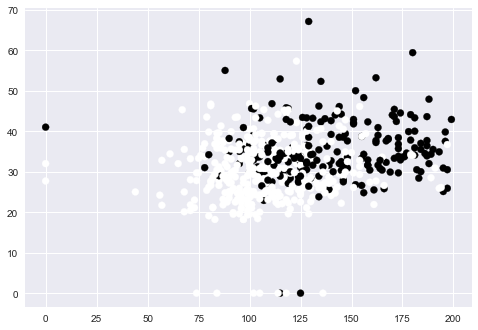

In [8]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

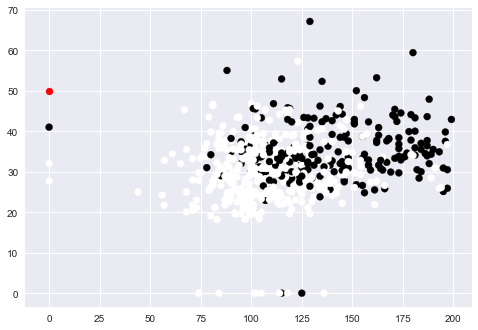

In [9]:
query_x=np.array([0,50])
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [13]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X_train,Y_train,query_point,k=2):
    vals=[]
    m=X_train.shape[0]
    
    
    for i in range(m):
        d=dist(query_point,X_train[i])
        vals.append((d,Y_train[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
    
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred    


In [14]:
for i in range(192):
    Y_test=knn(X_train,Y_train,X_test[i])
    print(int(Y_test))
      
      

1
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0


In [15]:
with open('C:/Users/admin/Desktop/out1.csv','w') as file:
    for i in range(192):
        y_test=knn(X_train,Y_train,X_test[i])
        file.write(str(int(y_test)))
        file.write("\n")